In [18]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
import emoji
from pprint import pprint
import collections

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

#import gensim
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
#from spellchecker import SpellChecker

import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)

In [20]:
df_tweet_en = pd.read_pickle('../../data/final/sondage_polarity.p')
df_tweet_en

,sentiment,text
0,positive,"c'est d'abord un sentiment de curiosité, d'étude. Evaluer si ces capteurs sont utiles ou non ."
1,negative,"Ils sont présents, ne me gênent pas plus que ça; je ne peux rien y faire donc bon...."
10,positive,"Dans la mesure ou sur la base d'une analyse en ACV, le système est plus performant, j'y vois un avantage. Cependant, les systèmes intelligents risquent d'une part de rendre plus dépendant les utilisateurs et un comportement moins intelligent."
11,positive,"L'IoT dans la vie quotidienne me permet de ressentir une certaine forme de contrôle sur les choses, ce qui est apaisant, serein."
12,negative,"Je suis intéressée par les bénéfices que peuvent apporter les dispositifs IoT, mais également inquiète de ce qui pourrait en être tiré s'ils sont détournés de leur objectif primaire."
16,positive,L’Internet des Objets réconcilie le monde numérique et virtuel crée par les réseaux informatique et les applications mobiles avec le monde physique.
17,positive,"Projette dans le futur, laisse imaginer toutes les améliorations possibles pour les usagers et pour la planète."
19,positive,J'aime la modernité.
20,positive,Je pense que l'usage des dispositifs IoT dans la vie quotidienne permet une plus grande sérénité que ce soit pour l'écologie et la sécurité.
25,positive,"l'IoT nous permettra d'adopter un comportement plus écocitoyen, avec un peu de compétition, pour campus plus vert."


In [23]:
new_df_tweet_en = pd.DataFrame(columns=['text', 'emotion'])
for row in df_tweet_en.itertuples(index=False):
    #column_name  = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
    column_name  = ['positive','negative']
    for i in range (1,len(row)-1): 
        if row[i] == 1:
            emotion = row.sentiment
            text = row.text
            new_df_tweet_en = new_df_tweet_en.append({'text' : text , 'emotion' : emotion} , ignore_index=True)
            break
new_df_tweet_en

,text,emotion


In [25]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    def space_uderscore(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        #return re.sub(r':([a-z&]+)_([a-z&]+):', r'\1\2', input_text)
        return input_text.replace('_',' ')
    
    def emoji_demojize(self, input_text):
        text = emoji.demojize(input_text)
        return text

    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(self.space_uderscore).apply(self.emoji_demojize).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df

In [26]:
textcount = TextCounts()
df_eda = textcount.fit_transform(df_tweet_en.text)
# Add airline_sentiment to df_eda
df_eda['sentiment'] = df_tweet_en.sentiment
df_eda['origin_text'] = df_tweet_en.text


In [27]:
df_eda

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,sentiment,origin_text
0,18,0,0,0,0,0,0,positive,"c'est d'abord un sentiment de curiosité, d'étude. Evaluer si ces capteurs sont utiles ou non ."
1,18,0,0,0,0,0,0,negative,"Ils sont présents, ne me gênent pas plus que ça; je ne peux rien y faire donc bon...."
10,41,0,0,1,0,0,0,positive,"Dans la mesure ou sur la base d'une analyse en ACV, le système est plus performant, j'y vois un avantage. Cependant, les systèmes intelligents risquent d'une part de rendre plus dépendant les utilisateurs et un comportement moins intelligent."
11,23,0,0,0,0,0,0,positive,"L'IoT dans la vie quotidienne me permet de ressentir une certaine forme de contrôle sur les choses, ce qui est apaisant, serein."
12,30,0,0,0,0,0,0,negative,"Je suis intéressée par les bénéfices que peuvent apporter les dispositifs IoT, mais également inquiète de ce qui pourrait en être tiré s'ils sont détournés de leur objectif primaire."
16,23,0,0,0,0,0,0,positive,L’Internet des Objets réconcilie le monde numérique et virtuel crée par les réseaux informatique et les applications mobiles avec le monde physique.
17,17,0,0,0,0,0,0,positive,"Projette dans le futur, laisse imaginer toutes les améliorations possibles pour les usagers et pour la planète."
19,4,0,0,0,0,0,0,positive,J'aime la modernité.
20,26,0,0,0,0,0,0,positive,Je pense que l'usage des dispositifs IoT dans la vie quotidienne permet une plus grande sérénité que ce soit pour l'écologie et la sécurité.
25,19,0,0,0,0,0,0,positive,"l'IoT nous permettra d'adopter un comportement plus écocitoyen, avec un peu de compétition, pour campus plus vert."


In [28]:
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('sentiment')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='sentiment', size=5, hue='sentiment', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()

Descriptive stats for count_words
---------------------------------
           count   mean        std  min   25%   50%    75%    max
sentiment                                                        
negative   20.0   22.65  20.243972  0.0  11.5  19.5  30.00  75.0 
positive   80.0   25.20  24.730650  0.0  9.0   17.5  32.25  124.0


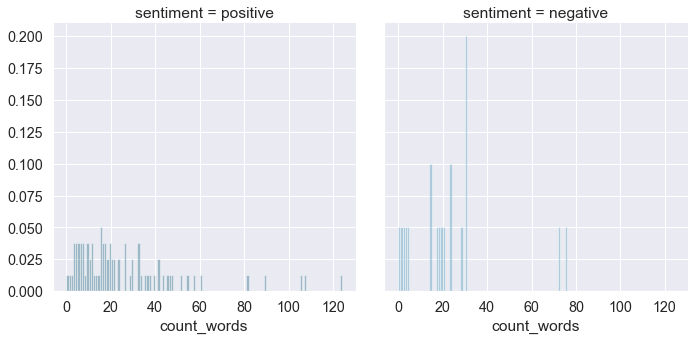

In [29]:
show_dist(df_eda, 'count_words')

Descriptive stats for count_mentions
------------------------------------
           count  mean  std  min  25%  50%  75%  max
sentiment                                           
negative   20.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
positive   80.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0


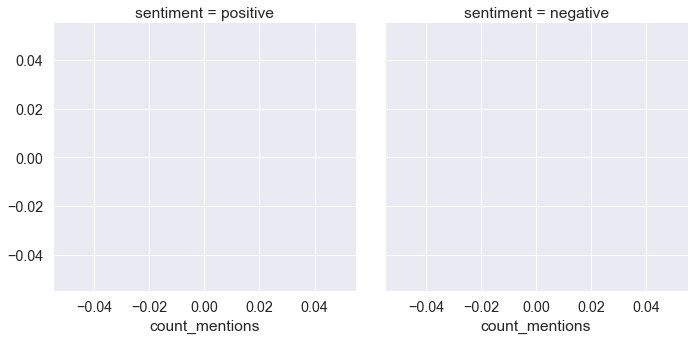

In [30]:
show_dist(df_eda, 'count_mentions')

Descriptive stats for count_hashtags
------------------------------------
           count  mean  std  min  25%  50%  75%  max
sentiment                                           
negative   20.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
positive   80.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0


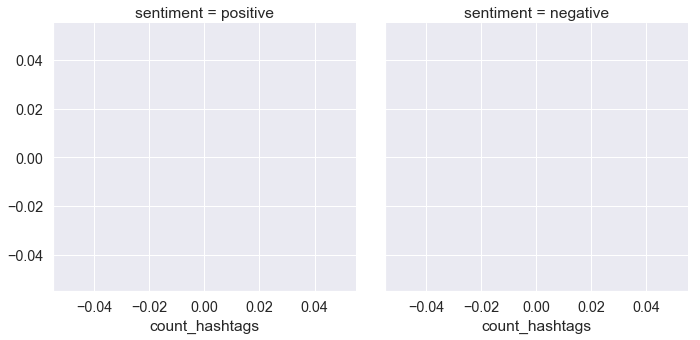

In [31]:
show_dist(df_eda, 'count_hashtags')

Descriptive stats for count_capital_words
-----------------------------------------
           count  mean       std  min  25%  50%  75%  max
sentiment                                                
negative   20.0   0.05  0.223607  0.0  0.0  0.0  0.0  1.0
positive   80.0   0.05  0.270957  0.0  0.0  0.0  0.0  2.0


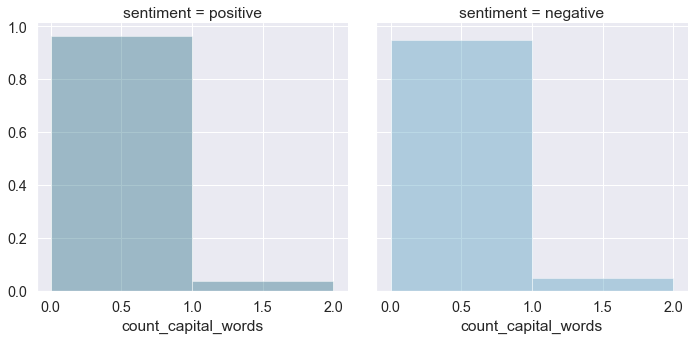

In [32]:
show_dist(df_eda, 'count_capital_words')

Descriptive stats for count_excl_quest_marks
--------------------------------------------
           count    mean       std  min  25%  50%  75%  max
sentiment                                                  
negative   20.0   0.2500  0.550120  0.0  0.0  0.0  0.0  2.0
positive   80.0   0.0375  0.191182  0.0  0.0  0.0  0.0  1.0


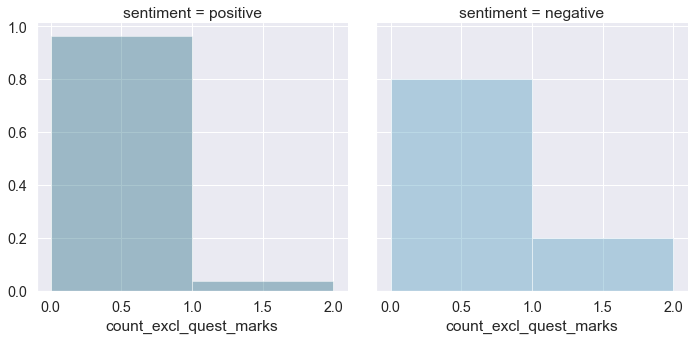

In [33]:
show_dist(df_eda, 'count_excl_quest_marks')

Descriptive stats for count_urls
--------------------------------
           count  mean       std  min  25%  50%  75%  max
sentiment                                                
negative   20.0   0.1   0.447214  0.0  0.0  0.0  0.0  2.0
positive   80.0   0.0   0.000000  0.0  0.0  0.0  0.0  0.0


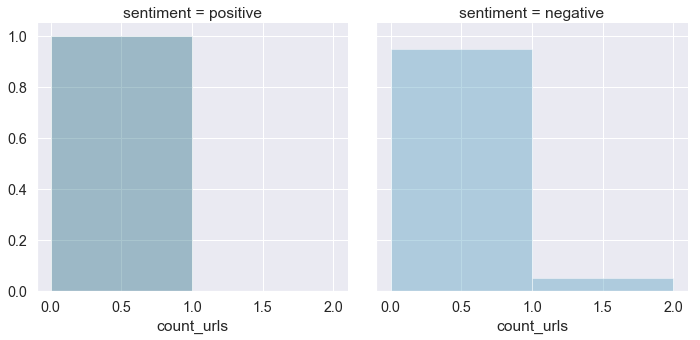

In [34]:
show_dist(df_eda, 'count_urls')

Descriptive stats for count_emojis
----------------------------------
           count  mean  std  min  25%  50%  75%  max
sentiment                                           
negative   20.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
positive   80.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0


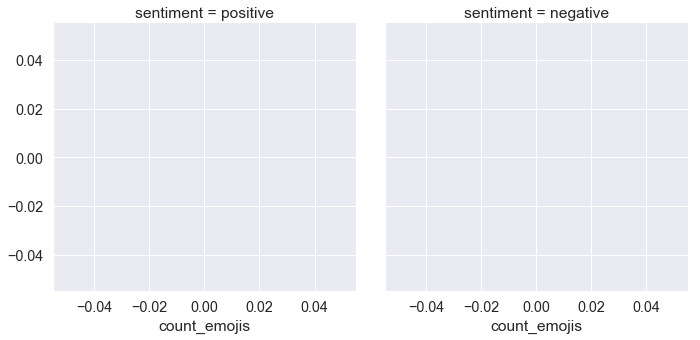

In [35]:
show_dist(df_eda, 'count_emojis')

In [36]:
class CleanText(BaseEstimator, TransformerMixin):
    
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    #def remove_hashtags(self, input_text):
        #return re.sub(r'#\w+', '', input_text)    
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_demojize(self, input_text):
        #demojize all emojis 
        return emoji.demojize(input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        #return re.sub(r':([a-z&]+)_([a-z&]+):', r'\1\2', input_text)
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def replace_acronyms(self, input_text):
        acronyms_dic = {
            "b/c":"because",
"b4":"before",
"bb":"blackberry",
"bfn":"bye for now",
"bgd":"background",
"br":"best regards",
"btw":"by the way",
"chk":"check",
"cld":"could",
"clk":"click",
"cre8":"create",
"cul8r":"see you later",
"ct":"cutweet",
"cya":"see you",
"deets":"details",
"dam":"don’t annoy me",
"dm":"direct message",
"dp":"profile picture",
"dweet":"tweet sent whilst drunk",
"dyk":"did you know?",
"em":"email",
"eml":"email",
"ema":"email address",
"f2f":"face to face",
"ff":"follow friday",
"fml":"fuck my life",
"fotd":"find of the day",
"ftl":"for the loss",
"ftw":"fuck the world",
"fwd":"forward",
"fyi":"for your information",
"glhf":"good luck have fun",
"gm":"good morning",
"gr8":"great",
"gtfoh":"get the fuck outta here!",
"gts":"guess the song",
"hand":"have a nice day",
"ho":"hangover",
"ht":"heard through",
"ic":"i see",
"icnbi":"i cannot believe it",
"icymi":"in case you missed it",
"idk":"i don’t know",
"im":"instant message",
"imo":"in my opinion",
"imho":"in my humble opinion",
"iykwim":"if you know what i mean",
"irl":"in real life",
"itz":"it is",
"jk":"just kidding",
"jsyk":"just so you know",
"jw":"just wondering",
"k":"okay",
"kk":"cool, cool",
"kyso":"knock your socks off",
"l2s":"life’s too short",
"l8":"late",
"l8r":"later",
"lhh":"laugh hella hard",
"lol":"laughing out loud",
"lmao":"laughing my ass off",
"lmfao":"laughing my fucking ass off",
"lmk":"let me know",
"mil":"million",
"milt":"mum i would like to tweet!",
"mt":"modified tweet",
"njoy":"enjoy",
"nsfw":"not safe for work",
"nw":"now watching",
"oct":"obsessive compulsive tweeter",
"oh":"overheard",
"omb":"oh my god",
"omg":"oh my god",
"oomf":"one of my followers",
"peeps":"people",
"plz":"please",
"ppl":"people",
"props":"proper respect",
"r":"are",
"rec":"recommendation",
"rt":"retweet",
"rthx":"thanks for the retweet",
"ru":"are you?",
"seo":"search engine optimization",
"shld":"should",
"smh":"shake my head",
"stfu":  "shut the fuck up",
"speets": "spam tweets",
"sweeple": "sweet twitter people",
"swhit": "tweeting whilst on the toilet",
"ta": "thanks a lot",
"tbh": "to be honest",
"tff": "twitter friend forever",
"tftt": "thanks for this tweet",
"ttfn": "ta ta for now",
"tgif": "thank god it is friday",
"thx": "thanks",
"ty": "thank you",
"tia": "thanks in advance",
"tl": "timeline",
"toybt": "tired of your bullshit",
"tt": "trending topic",
"ttyl": "talk to you later",
"ttys": "talk to you soon",
"tyl": "tweet y’all later",
"u": "you",
"vols": "volunteers",
"w": "with",
"w/e": "weekend",
"wld": "would",
"wtf": "what the fuck?",
"wth": "what the hell?",
"wtv": "whatever",
"wltm": "would like to meet",
"wzup": "what’s up?",
"xoxo": "hugs and kisses",
"ykim": "you know what i mean",
"ykyat": "you know you’re addicted to",
"yolo": "you only live once",
"yoyo" : "you are on your own",
"yw" : "you are welcome"
                       }
        acronyms_pattern = re.compile(r'\b(' + '|'.join(acronyms_dic.keys()) + r')\b')
        return acronyms_pattern.sub(lambda x: acronyms_dic[x.group()], input_text)
        
    def stopwords_spell(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no","ain't"]
        blacklist = ["via","rt"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) 
                       and (word not in blacklist) and len(word) > 1] 
        #correct words
        #spell = SpellChecker()
        correct_words = [word for word in clean_words]
        return " ".join(correct_words) 
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_demojize).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.replace_acronyms).apply(self.stopwords_spell)
        return clean_X

In [85]:
cleantext = CleanText()
sr_clean = cleantext.fit_transform(new_df_tweet_en.text)
sr_clean

0       happy share new video preview local fav compose excitement                                                                          
1       goddamn celebrity draft end classic                                                                                                 
2       dreams dashed divided like million stars night sky                                                                                  
3       accept challenges literally even feel exhilaration victory george patton dogface                                                    
4       happy birthday brother another mother dis year blessing break                                                                       
5       rejoicing finally match draw revealed facing city next life sef                                                                     
6       cure anxiety intimate relationship christ john anxiety                                                                              
7       serio

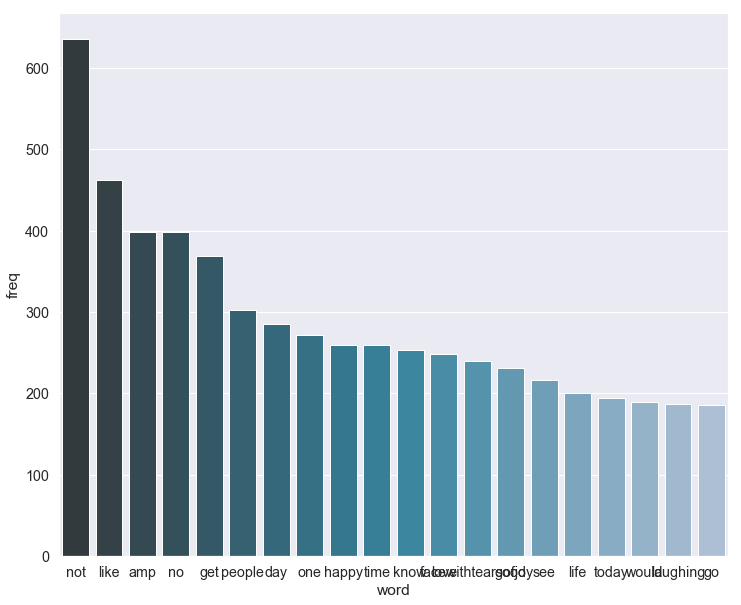

In [86]:
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

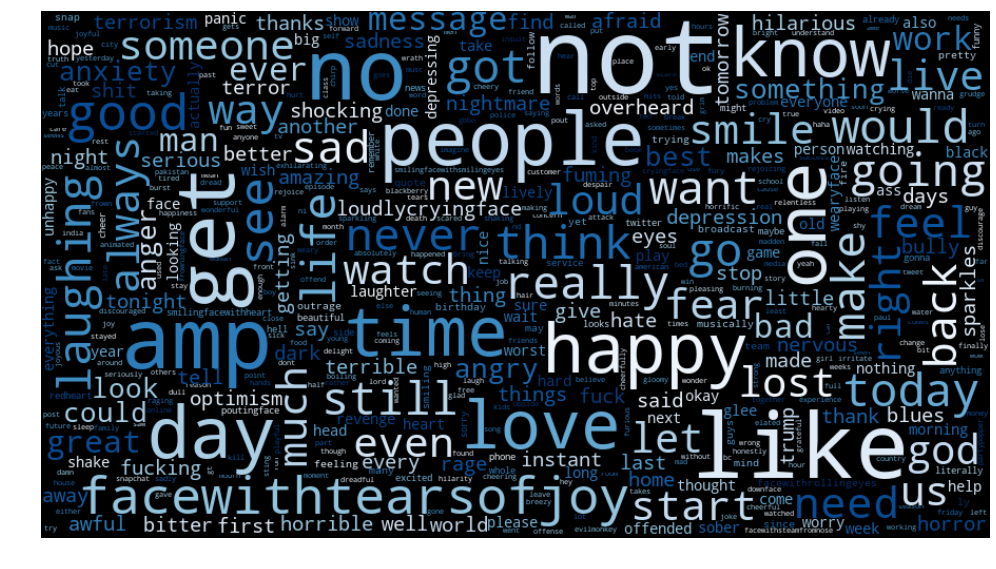

In [87]:
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(word_counter)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
df_model = df_eda
df_model['clean_text'] = sr_clean
df_model = df_model.drop_duplicates('clean_text')

In [89]:
df_model.shape

(7438, 10)

In [91]:
df_model.describe()

,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis
count,7438.000000,7438.000000,7438.000000,7438.000000,7438.000000,7438.0,7438.000000
mean,16.661199,0.616429,1.102447,0.226539,0.402259,0.0,0.243211
std,6.863723,0.881333,1.833016,0.829508,0.944076,0.0,1.165424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,17.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,22.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.000000
max,36.000000,9.000000,16.000000,21.000000,12.000000,0.0,73.000000


In [92]:
df_model['clean_text'].replace('', np.nan, inplace=True)

In [93]:
df_model = df_model.dropna(axis=0, subset=['clean_text'])


,count_words,count_mentions,count_hashtags,count_capital_words,count_excl_quest_marks,count_urls,count_emojis,sentiment,origin_text,clean_text
0,22,5,2,1,1,0,0,joy,Happy to share my new video preview with some of my local fav's!\n#compose #excitement @CBCMusic @Musicyyc @CJSW @BreakOutWest @HifiClub,happy share new video preview local fav compose excitement
1,14,5,0,0,0,0,0,anticipation,@FieldYates @MatthewBerryTMR @Stephania_ESPN @MikeClayNFL @FrankCaliendo goddamn...the 'celebrity' draft at the end was classic.,goddamn celebrity draft end classic
2,11,0,0,0,0,0,0,pessimism,Dreams dashed and divided like million stars in the night sky.,dreams dashed divided like million stars night sky
3,17,0,0,0,0,0,1,joy,Accept the challenges so that you can literally even feel the exhilaration of victory.' -- George S. Patton 🐶,accept challenges literally even feel exhilaration victory george patton dogface
4,15,1,1,0,0,0,0,joy,Happy birthday to ma brother from another mother @Official1Cedi dis year More blessing #Break itz,happy birthday brother another mother dis year blessing break
5,24,0,0,0,0,0,0,joy,Just now we were rejoicing that we finally won a match the draw just revealed that we are facing city next. This life sef,rejoicing finally match draw revealed facing city next life sef
6,15,0,1,0,0,0,0,fear,The cure for anxiety is an intimate relationship with Christ. - 1 John 4:18 #anxiety,cure anxiety intimate relationship christ john anxiety
7,18,0,0,0,0,0,0,anger,I have serious problems with the expectation that private philanthropy should replace functional government services...this is dangerous,serious problems expectation private philanthropy replace functional government services dangerous
8,23,0,4,1,0,0,0,anger,#India right of reply at #UNGA - #Pakistan preaching of human rights is by a country which is itself the global epicentre of #terrorism,india right reply unga pakistan preaching human rights country global epicentre terrorism
9,15,2,0,0,0,0,0,anger,@faithstrust @TheeCurrentYear imagine being this stupid for trying to chirp because of some racist prick.,imagine stupid trying chirp racist prick


In [96]:
#len(df_model)

In [9]:
df_model = pd.read_pickle('../../data/final/NotIot_clean_FR_tweets_polarity.p') # save dframe to pickle

In [10]:
plt.figure();

<Figure size 432x288 with 0 Axes>

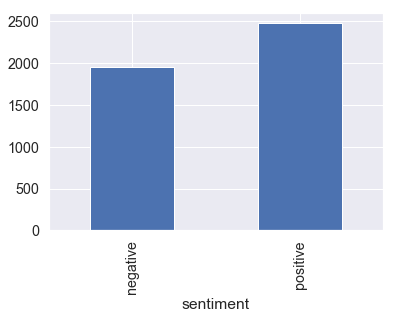

In [11]:
#df_model['sentiment'].values.hist()
df_model['clean_text'].groupby([df_model.sentiment]).count().plot(kind='bar')
